# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
import random 
import csv
import time
import os

from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [51]:
# out_put_data_file = "../output_data/cities.csv"

# need random numbers --- 600 bewtween -90 & 90 for lat
lat_numbers = []

for num in range(0, 2000):
    x = random.randint(-90,90)
    lat_numbers.append(x)

# need random numbers --- 600 between -180 & 180 for lng
lng_numbers = []

for num in range(0, 2000):
    y = random.randint(-180, 180)
    lng_numbers.append(y)

#shove numbers in dataframe in lat & lng columns
cities_fake_lat_lng_df = pd.DataFrame({"City": "", 
                          "Lat": lat_numbers,
                          "Lng": lng_numbers})

# get below per each lat & lng number
city_name = []


for index, row in cities_fake_lat_lng_df.iterrows():
    city = citipy.nearest_city(row["Lat"], row["Lng"])
    city_name.append(city.city_name)
    
# save in city name in DF & GET RID OF DUPLICATES
city_df = pd.DataFrame({"City": city_name})

city_df = city_df.drop_duplicates()
print(city_df.count())


city_df.head()

City    754
dtype: int64


,City
0,clearwater
1,guaraniacu
2,vila franca do campo
3,meulaboh
4,marcona


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# Ins_OpenWeatherRequest ---- for weather API (when we used it)
### 02-API-try-except/03-Ins_OpenWeatherRequest/Unsolved/Ins_OpenWeatherRequest.ipynb
# Ins_IterativeRequests ---- for multi requests
### 01-Intro-to-APIs/09-Ins_IterativeRequests/Unsolved/Ins_IterativeRequests.ipynb
# NearestRestr_SOLVED ---- for try, except errors
### 03-Google-Census/04-Ins_NearestRestr/Unsolved/NearestRestr_SOLVED.ipynb

##### ROAD MAP TO HOW TO DO THE BELOW: yays

### THEY DID THEIR EXAMPLE REQUESTS IN GROUPS OF 50
# Processing Record 1 of Set 1 | butaritari
# class example = for record #, need to figure out for set #

In [79]:
#looked it up -- need + instead of spaces for api lookup
city_df["City"] = city_df["City"].str.replace(' ', '+')

# was for testing
# city_df_mini = pd.DataFrame(city_df["City"][0:10])

#make empty columns
city_df['City Name'] = ""
city_df['Lat'] = ""
city_df['Lng'] = ""
city_df['Max Temp'] = ""
city_df['Humidity'] = ""
city_df['Cloudiness'] = ""
city_df['Wind Speed'] = ""
city_df['Country'] = ""
city_df['Date'] = ""

print("Beginning Data Retrieval")
print("-----------------------------")


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

set = 1
count = 0


for index, row in city_df.iterrows():
    # make query URLs (yay works)
    city = row['City']
    query_url = url + "appid=" + weather_api_key +"&q=" + city + "&units=" + units
    
    #get response json()
    response = requests.get(query_url).json()

    # SHOVE IT IN DATAFRAME IF EXISTS!!!!!!
    try: 
        print(f"Processing Record {count} Set {set} | {city}")
        city_df.loc[index, 'City Name'] = response['name']
        city_df.loc[index, 'Lat'] = response['coord']['lat']
        city_df.loc[index, 'Lng'] = response['coord']['lon']
        city_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_df.loc[index, 'Humidity'] = response['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        city_df.loc[index, 'Country'] = response['sys']['country']
        city_df.loc[index, 'Date'] = response['dt']
        count += 1
    except(KeyError, IndexError):
        print(f"City not found. Skipping...")
        count += 1
        
    if count == 50:
        set += 1
        time.sleep(60)
        count = 0
        


Beginning Data Retrieval
-----------------------------
Processing Record 0 Set 1 | Clearwater
Processing Record 1 Set 1 | Guaraniaçu
Processing Record 2 Set 1 | Vila+Franca+do+Campo
Processing Record 3 Set 1 | Meulaboh
Processing Record 4 Set 1 | marcona
City not found. Skipping...
Processing Record 5 Set 1 | Norman+Wells
Processing Record 6 Set 1 | Buraidah
Processing Record 7 Set 1 | Puerto+Ayora
Processing Record 8 Set 1 | attawapiskat
City not found. Skipping...
Processing Record 9 Set 1 | Avarua
Processing Record 10 Set 1 | Hong+Kong
Processing Record 11 Set 1 | Qaanaaq
Processing Record 12 Set 1 | Port+Macquarie
Processing Record 13 Set 1 | Yulara
Processing Record 14 Set 1 | Butaritari
Processing Record 15 Set 1 | Tasiilaq
Processing Record 16 Set 1 | Rikitea
Processing Record 17 Set 1 | Dikson
Processing Record 18 Set 1 | Parfino
Processing Record 19 Set 1 | Rocha
Processing Record 20 Set 1 | Neiafu
Processing Record 21 Set 1 | Ribeira+Grande
Processing Record 22 Set 1 | nguiu


Processing Record 46 Set 4 | Kirakira
Processing Record 47 Set 4 | Iranshahr
Processing Record 48 Set 4 | Fortuna
Processing Record 49 Set 4 | Madang
Processing Record 0 Set 5 | Linqiong
Processing Record 1 Set 5 | Vestmannaeyjar
Processing Record 2 Set 5 | Susanville
Processing Record 3 Set 5 | Salalah
Processing Record 4 Set 5 | Loma+Bonita
Processing Record 5 Set 5 | Berlevåg
Processing Record 6 Set 5 | Mahébourg
Processing Record 7 Set 5 | Thompson
Processing Record 8 Set 5 | Cherskiy
Processing Record 9 Set 5 | Tiksi
Processing Record 10 Set 5 | George+Town
Processing Record 11 Set 5 | Grakhovo
Processing Record 12 Set 5 | Synya
Processing Record 13 Set 5 | Gemeente+IJsselstein
Processing Record 14 Set 5 | Ust-Maya
Processing Record 15 Set 5 | Cidreira
Processing Record 16 Set 5 | Camacha
Processing Record 17 Set 5 | Havøysund
Processing Record 18 Set 5 | Matam
Processing Record 19 Set 5 | Ostrovnoy
Processing Record 20 Set 5 | Itarantim
Processing Record 21 Set 5 | Balsas
Process

Processing Record 46 Set 8 | Taseyevo
Processing Record 47 Set 8 | Saurimo
Processing Record 48 Set 8 | Troitskoye
Processing Record 49 Set 8 | Saint-Philippe
Processing Record 0 Set 9 | Chui
Processing Record 1 Set 9 | Buala
Processing Record 2 Set 9 | Talcahuano
Processing Record 3 Set 9 | Cascais
Processing Record 4 Set 9 | Pāvilosta
Processing Record 5 Set 9 | Ouango
Processing Record 6 Set 9 | Bengkulu
Processing Record 7 Set 9 | Owando
Processing Record 8 Set 9 | Nago
Processing Record 9 Set 9 | Tual
Processing Record 10 Set 9 | Aksarka
Processing Record 11 Set 9 | Kikwit
Processing Record 12 Set 9 | Hūn
Processing Record 13 Set 9 | Chumikan
Processing Record 14 Set 9 | Hanover
Processing Record 15 Set 9 | Pangai
Processing Record 16 Set 9 | Kalengwa
Processing Record 17 Set 9 | Orange+Walk+District
Processing Record 18 Set 9 | Pyshma
Processing Record 19 Set 9 | Dwārka
Processing Record 20 Set 9 | Diamantino
Processing Record 21 Set 9 | Khovd
Processing Record 22 Set 9 | Samarai

Processing Record 46 Set 12 | Camaçari
Processing Record 47 Set 12 | Ambunti
Processing Record 48 Set 12 | Langham
Processing Record 49 Set 12 | Cheremkhovo
Processing Record 0 Set 13 | Waingapu
Processing Record 1 Set 13 | Flinders
Processing Record 2 Set 13 | karamea
City not found. Skipping...
Processing Record 3 Set 13 | Taltal
Processing Record 4 Set 13 | Faya
Processing Record 5 Set 13 | Yeppoon
Processing Record 6 Set 13 | Neuquén
Processing Record 7 Set 13 | Lewisporte
Processing Record 8 Set 13 | Kurumkan
Processing Record 9 Set 13 | Kilindoni
Processing Record 10 Set 13 | Ormara
Processing Record 11 Set 13 | Floriano
Processing Record 12 Set 13 | la+gaulette
City not found. Skipping...
Processing Record 13 Set 13 | Lapua
Processing Record 14 Set 13 | Pacific+Grove
Processing Record 15 Set 13 | Nuevitas
Processing Record 16 Set 13 | Bazarnye+Mataki
Processing Record 17 Set 13 | Jaqué
Processing Record 18 Set 13 | Bonavista
Processing Record 19 Set 13 | Shahrud
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [463]:
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City Name
0,Clearwater,27.97,-82.8,81,61,2,6.93,US,1602980412,Clearwater
1,Guaraniaçu,-25.1,-52.88,61.74,67,58,3.11,BR,1602980697,Guaraniaçu
2,Vila+Franca+do+Campo,37.72,-25.43,62.6,67,75,8.05,PT,1602980697,Vila Franca do Campo
3,Meulaboh,4.14,96.13,75.72,82,100,4.09,ID,1602980210,Meulaboh
4,marcona,,,,,,,,,
5,Norman+Wells,65.28,-126.83,23,57,5,5.82,CA,1602980676,Norman Wells
6,Buraidah,26.33,43.98,64.4,25,0,6.08,SA,1602980697,Buraidah
7,Puerto+Ayora,-0.74,-90.35,71.01,87,87,5.99,EC,1602980698,Puerto Ayora
8,attawapiskat,,,,,,,,,
9,Avarua,-21.21,-159.78,77,69,70,16.11,CK,1602980120,Avarua


In [464]:
# MAKE A FREAKING NEW DF SO YOU DON'T HAVE TO RUN IT AGAIN!!!!!!
city_df_clean = city_df.copy()
city_df_clean.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City Name
0,Clearwater,27.97,-82.8,81,61,2,6.93,US,1602980412,Clearwater
1,Guaraniaçu,-25.1,-52.88,61.74,67,58,3.11,BR,1602980697,Guaraniaçu
2,Vila+Franca+do+Campo,37.72,-25.43,62.6,67,75,8.05,PT,1602980697,Vila Franca do Campo
3,Meulaboh,4.14,96.13,75.72,82,100,4.09,ID,1602980210,Meulaboh
4,marcona,,,,,,,,,


In [465]:
# get rid of empty rows
city_df_clean['Lat'].replace("", np.nan, inplace=True)
city_df_clean.dropna(how="any", inplace=True)

# get rid of dup city column and rename right one
city_df_clean = city_df_clean.drop(columns=['City'])
city_df_clean = city_df_clean.rename(columns={'City Name': 'City'})

In [466]:
# reorder columns
city_df_clean = city_df_clean[['City','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# # make csv & display
city_df_clean.to_csv(r'../output_data/cities.csv', index=True, header=True)
city_df_clean.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Clearwater,27.97,-82.8,81,61,2,6.93,1602980412
1,Guaraniaçu,-25.10,-52.88,61.74,67,58,3.11,1602980697
2,Vila Franca do Campo,37.72,-25.43,62.6,67,75,8.05,1602980697
3,Meulaboh,4.14,96.13,75.72,82,100,4.09,1602980210
5,Norman Wells,65.28,-126.83,23,57,5,5.82,1602980676


In [467]:
city_df_stats = pd.DataFrame(city_df_clean[['Lat', 'Lng', 'Max Temp', 'Humidity', 
                                      'Cloudiness', 'Wind Speed', 'Date']].astype(int))

city_df_count = city_df_stats.count()
city_df_mean = city_df_stats.mean()
city_df_std = city_df_stats.std()
city_df_min = city_df_stats.min()
city_df_25 = city_df_stats.quantile(.25, axis=0)
city_df_5 = city_df_stats.quantile(.5, axis=0)
city_df_75 = city_df_stats.quantile(.75, axis=0)
city_df_max = city_df_stats.max()


city_df_stats_filled = pd.DataFrame({"count": city_df_count, "mean": city_df_mean,
                                          "std": city_df_std, "min": city_df_min,
                                          "25%": city_df_25, "50%": city_df_5,
                                          "75%": city_df_75, "max": city_df_max})
city_df_stats_filled = city_df_stats_filled.transpose()
city_df_stats_filled



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,6.880000e+02
mean,19.691860,13.283430,60.508721,72.215116,49.431686,7.187500,1.602981e+09
std,32.780747,90.974217,19.742666,20.727390,39.989241,5.207599,4.354535e+02
min,-54.000000,-179.000000,4.000000,1.000000,0.000000,0.000000,1.602980e+09
25%,-8.000000,-67.000000,46.000000,62.750000,1.000000,3.000000,1.602981e+09
50%,22.000000,19.000000,65.000000,77.000000,47.000000,6.000000,1.602981e+09
75%,47.000000,86.000000,77.000000,88.000000,90.000000,10.000000,1.602982e+09
max,78.000000,179.000000,98.000000,100.000000,100.000000,32.000000,1.602982e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

* humidity max = 100 so you are good to go :D 



In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [468]:
# for reference & plotting data below:
city_df_clean.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Clearwater,27.97,-82.8,81,61,2,6.93,1602980412
1,Guaraniaçu,-25.10,-52.88,61.74,67,58,3.11,1602980697
2,Vila Franca do Campo,37.72,-25.43,62.6,67,75,8.05,1602980697
3,Meulaboh,4.14,96.13,75.72,82,100,4.09,1602980210
5,Norman Wells,65.28,-126.83,23,57,5,5.82,1602980676


## Latitude vs. Temperature Plot

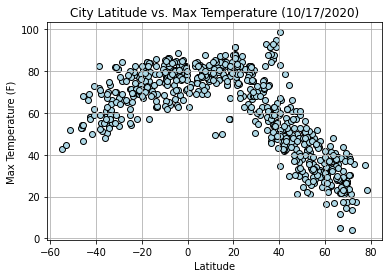

In [469]:
x_lat = city_df_clean['Lat']
y_max_temp = city_df_clean['Max Temp']

plt.scatter(x_lat, y_max_temp, color="lightblue", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/17/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 1.png")

plt.show()


## Analysis:
* Latitude is the distance measured south (max -90) or north (max 90) of the euator (0). 
* The graph below shows that temperatures in the south are warmer as it is edging towards their spring. Temperatures are high arond the equator as it recieves more direct sunlight then other areas.Unsurprisingly, temperatures north of the equater (espeically far north) are colder as we turn towardsfall.

## Latitude vs. Humidity Plot

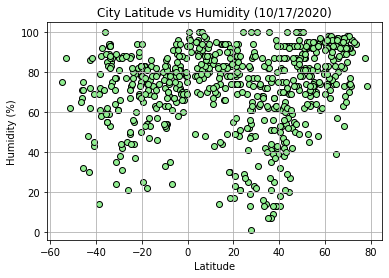

In [470]:
x_lat = city_df_clean['Lat']
y_humidity = city_df_clean['Humidity']

plt.scatter(x_lat, y_humidity, color="lightgreen", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (10/17/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 2.png")

plt.show()

## Analysis: 
* There is high humidity around the world. Latitude does not exclude an area from humidity. There is however a very heavy cluster around latitude 60.      

## Latitude vs. Cloudiness Plot

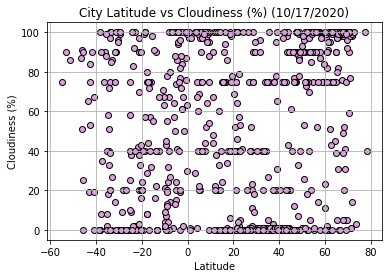

In [471]:
x_lat = city_df_clean['Lat']
y_cloudiness = city_df_clean['Cloudiness']

plt.scatter(x_lat, y_cloudiness, color="plum", edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%) (10/17/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 3.png")

plt.show()

## Analysis
* Similar to humidity, latiitude does note exclude an area from cloudiness. Surprisingly there are a lot of cities that have either 100 (rain or potentially overcast) or 0 (clear skies) on 10/17/2020. There are also groupings at 75 (mostly cloudy) and 40 (partially cloudy). This suddenly explains weather forecaster's lingo so much better.

## Latitude vs. Wind Speed Plot

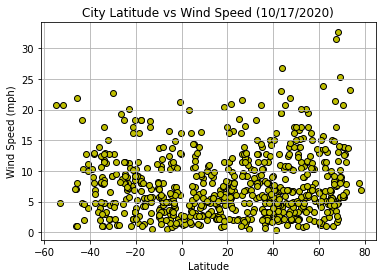

In [472]:
x_lat = city_df_clean['Lat']
y_wind_speed = city_df_clean['Wind Speed']

plt.scatter(x_lat, y_wind_speed, color="y", edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (10/17/2020)")
plt.grid(True)
plt.savefig("../output_data/Fig 4.png")

plt.show()

## Analysis
* Wind blows the world over. The vast majority of cities do not experience wind over 15 miles per hour. Roughy 2/3 are under 10 miles an hour. 

## Linear Regression

In [473]:
# make Northern Hemisphere DF
north_hemisphere_df = city_df_clean[city_df_clean['Lat'] > 0]

# make Souther Hemispher DF
south_hemisphere_df = city_df_clean[city_df_clean['Lat'] < 0]

north_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Clearwater,27.97,-82.8,81,61,2,6.93,1602980412
2,Vila Franca do Campo,37.72,-25.43,62.6,67,75,8.05,1602980697
3,Meulaboh,4.14,96.13,75.72,82,100,4.09,1602980210
5,Norman Wells,65.28,-126.83,23,57,5,5.82,1602980676
6,Buraidah,26.33,43.98,64.4,25,0,6.08,1602980697


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7403711225297382


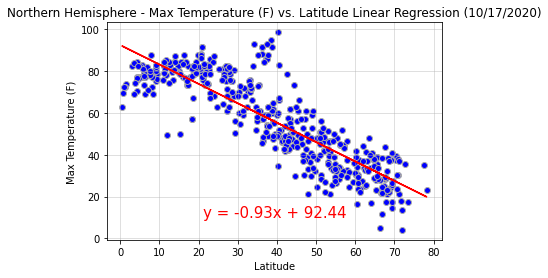

In [475]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_max_temp = north_hemisphere_df['Max Temp']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_temp_array = north_hemisphere_df.iloc[:,3].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_max_temp, color="blue", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_temp_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(21,10),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4442232318850417


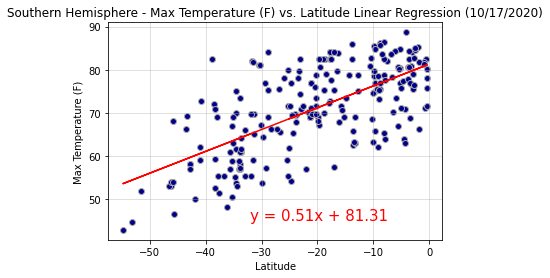

In [476]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_max_temp = south_hemisphere_df['Max Temp']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_temp_array = south_hemisphere_df.iloc[:,3].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_max_temp, color="darkblue", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature (F) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_temp_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-32,45),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Max Temp Notes:
* North - There is a strong correlation between decending temperature and latitude approaching the pole.
* South - There is a weak correlation between ascending temperature and latitude approaching the equator.
* The expect north descending (approaching fall) and south ascending (approaching spring) is shown.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02329918982680246


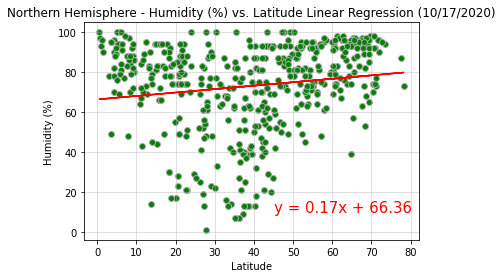

In [477]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_humidity = north_hemisphere_df['Humidity']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_humidity_array = north_hemisphere_df.iloc[:,4].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_humidity, color="green", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_humidity_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01467763823551507


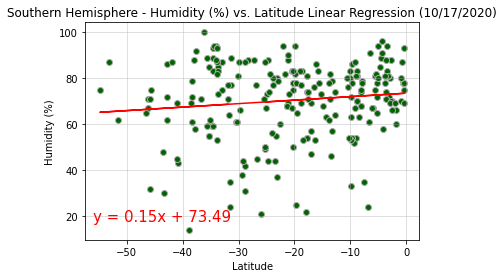

In [478]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_max_temp = south_hemisphere_df['Humidity']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_temp_array = south_hemisphere_df.iloc[:,4].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_max_temp, color="darkgreen", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_temp_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-56,18),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Humidity Notes:
* North - There is a very weak correlation between humidity and latitude approaching the pole.
* South - There is a very weak correlation between humidity and latitude approaching the equator.
* Latidude does not play any great part in influencing humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02546339220773057


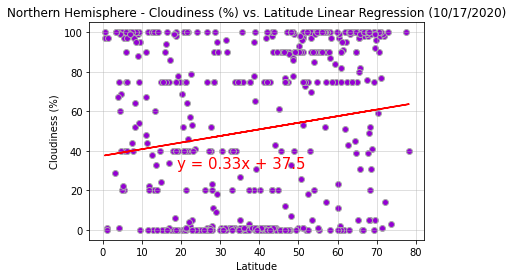

In [479]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_cloud = north_hemisphere_df['Cloudiness']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_cloud_array = north_hemisphere_df.iloc[:,5].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_cloud, color="darkviolet", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_cloud_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(19,31),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0035345440730463066


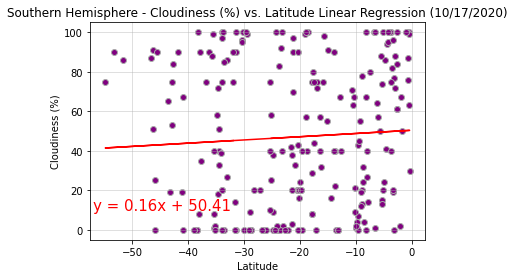

In [480]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_cloud = south_hemisphere_df['Cloudiness']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_cloud_array = south_hemisphere_df.iloc[:,5].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_cloud, color="purple", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_cloud_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-57,10),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Cloudinesss Notes:
* North - There is a very weak correlation between cloudiness and latitude approaching the pole.
* South - There is a no correlation between cloudiness and latitude approaching the equator.
* Latidude does not play any great part in influencing cloudiness, though during summer monsoon weather or hurricane season, there would be stronger correlations. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02488378178299839


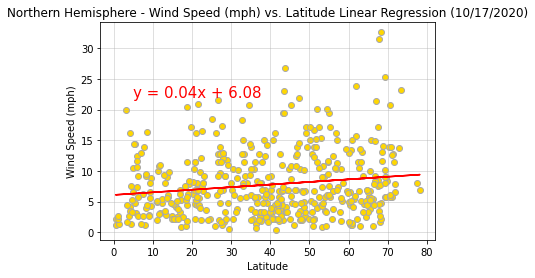

In [481]:
# Variables to be plotted/lined
north_x_lat = north_hemisphere_df['Lat']
north_y_wind = north_hemisphere_df['Wind Speed']
north_lat_array = north_hemisphere_df.iloc[:,1].astype(float)
north_wind_array = north_hemisphere_df.iloc[:,6].astype(float)

# Scatter plot & friends
plt.scatter(north_x_lat, north_y_wind, color="gold", edgecolor='darkgrey')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat_array, north_wind_array)

# regress - takes x * slope + intercept
regress_values = north_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(north_x_lat,regress_values,"r-")
plt.annotate(line_eq,(5,22),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026443419416835996


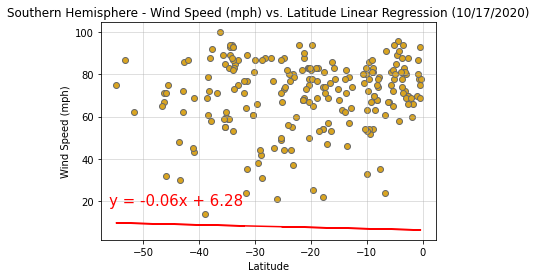

In [483]:
# Variables to be plotted/lined
south_x_lat = south_hemisphere_df['Lat']
south_y_wind = south_hemisphere_df['Wind Speed']
south_lat_array = south_hemisphere_df.iloc[:,1].astype(float)
south_wind_array = south_hemisphere_df.iloc[:,6].astype(float)

# Scatter plot & friends
plt.scatter(south_x_lat, south_y_max_temp, color="goldenrod", edgecolor='dimgray')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (10/17/2020)")
plt.grid(True, alpha=.5)


# Lineregress of complicated
# id ___ = lineregress(x & y values)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat_array, south_wind_array)

# regress - takes x * slope + intercept
regress_values = south_x_lat * slope + intercept

#line_eq = fancy math equation display
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot line
plt.plot(south_x_lat,regress_values,"r-")
plt.annotate(line_eq,(-56,18),fontsize=15,color="red")

# ** is squaring...48% of the variation (change to %)
print(f"The r-squared is: {rvalue**2}")

plt.show()

## Linear Regression Cloudinesss Notes:
* North - There is a no correlation between cloudiness and latitude approaching the pole.
* South - There is a no correlation between cloudiness and latitude approaching the equator.
* Latidude does not play any great part in influencing wind speed. However, like with cloudines seasonal extreme weather changes will come into affect, resulting in an increase in correlation.